# Install the needed libraries

In [ ]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 58.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 66.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 49.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.39.0-py3-none-any.whl size=25319737 sha256=77c03f09299819a76eab37dde586bb706b0f665d447fd9d22c1c70e18f37e282
  Stored in directory: /root/.cache/pip/wheels/98/fd/0a/ef6252223f3d2

## Import the needed libraries

In [ ]:
# %reload_ext autoreload
# %autoreload 2
# %matplotlib inline
# import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
# os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from ktrain.text.zsl import ZeroShotClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

zsl = ZeroShotClassifier()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

# Functions

## Find the first category from the probability

In [ ]:
def find_max_categories_for_lists(lists_of_category_scores):
    max_categories = []
    for category_scores in lists_of_category_scores:
        max_category = max(category_scores, key=lambda x: x[1])[0]
        max_categories.append(max_category)
    return max_categories

## Find the maximum first 2 categories from the probability

In [ ]:
def find_max_2_categories_for_lists(lists_of_category_scores):
    max_categories = []
    for category_scores in lists_of_category_scores:
        # Sort the categories based on their values in descending order
        sorted_categories = sorted(category_scores, key=lambda x: x[1], reverse=True)
        # Select the top two categories
        top_categories = [category[0] for category in sorted_categories[:2]]
        max_categories.append(top_categories)
    return max_categories

## check for the best category from the first 2 categories depending on the label of this data
if any of the 2 values are equal to the true label then return it


if none of them are equal to the true label then return the first value with the highest probability

In [ ]:
def return_best_category_from_2_categories(list1, list2):
  result = []
  for item1, item2 in zip(list1, list2):
      found = False
      for value in item2:
          if value in item1:
              result.append(value)
              found = True
              break
      if not found:
          result.append(item2[0])
  return result


## Compute classification report

In [ ]:
def compute_classification_report(true_labels_column, predicted_labels_column):
    report = classification_report(true_labels_column, predicted_labels_column, zero_division=1)
    accuracy = accuracy_score(true_labels_column, predicted_labels_column)
    precision = precision_score(true_labels_column, predicted_labels_column, average='macro', zero_division=1)
    recall = recall_score(true_labels_column, predicted_labels_column, average='macro', zero_division=1)
    f1 = f1_score(true_labels_column, predicted_labels_column, average='macro', zero_division=1)

    print("Classification Report:")
    print(report)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    return accuracy, precision, recall, f1

## Function to plot the metrics

In [ ]:
def plot_metrics(labels, accuracy_values, is_list_of_lists=True):
    if is_list_of_lists:
        accuracy_values_scaled_list = [[value * 100 for value in values] for values in accuracy_values]
    else:
        accuracy_values_scaled_list = [[value * 100 for value in accuracy_values]]

    # Create a grouped bar plot
    fig, ax = plt.subplots()
    bar_width = 0.2  # Width of each bar
    bar_positions = np.arange(len(labels))

    for i, accuracy_values_scaled in enumerate(accuracy_values_scaled_list):
        offset = i * bar_width  # Offset to position bars for each dataset
        bars = ax.bar(bar_positions + offset, accuracy_values_scaled, bar_width, label=f'Level {i + 1}')

        # Add values on top of the bars
        for bar, value in zip(bars, accuracy_values_scaled):
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01,
                    f'{value:.2f}%', ha='center', va='bottom')

    ax.set_xlabel('Datasets')
    ax.set_ylabel('Accuracy (%)')
    ax.set_title('Accuracy Comparison')
    ax.set_xticks(bar_positions + (bar_width * (len(accuracy_values_scaled_list) - 1)) / 2)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()


# Level 1

## 4 Topics Data

In [ ]:
df_1 = pd.read_csv("https://github.com/mhjabreel/CharCnn_Keras/raw/master/data/ag_news_csv/train.csv")
df_1.columns = ["label" , "title" , "content"]
df_1['label'] = df_1['label'].map({1: "World", 2: "Sports", 3: "Business", 4: "Sci/Tech"})
df_1

,label,title,content
0,Business,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
1,Business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
2,Business,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
3,Business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
4,Business,"Stocks End Up, But Near Year Lows (Reuters)",Reuters - Stocks ended slightly higher on Frid...
...,...,...,...
119994,World,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119995,Sports,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119996,Sports,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119997,Sports,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...


In [ ]:
df_1.label.value_counts()

Sci/Tech    30000
Sports      30000
World       30000
Business    29999
Name: label, dtype: int64

In [ ]:
X_1 = df_1.content.values
Y_1 = df_1.label


In [ ]:
%%time
df_prb_1 = zsl.predict(X_1, labels=["World","Sports","Business","Sci/Tech"], include_labels=True, batch_size = 32)

CPU times: user 34min 54s, sys: 27.9 s, total: 35min 22s
Wall time: 32min 14s


In [ ]:
df_pred_1 = find_max_categories_for_lists(df_prb_1)

In [ ]:
accuracy_1, precision_1, recall_1, f1_1 = compute_classification_report(Y_1 , df_pred_1)

Classification Report:
              precision    recall  f1-score   support

    Business       0.59      0.79      0.68     29999
    Sci/Tech       0.85      0.31      0.46     30000
      Sports       0.95      0.94      0.95     30000
       World       0.67      0.88      0.76     30000

    accuracy                           0.73    119999
   macro avg       0.77      0.73      0.71    119999
weighted avg       0.77      0.73      0.71    119999

Accuracy: 0.7298394153284611
Precision: 0.7656204210506138
Recall: 0.7298399221640721
F1 Score: 0.7099393650664271


## 6 Topics Data

In [ ]:
train = pd.read_csv("https://github.com/AnasElbattra/News-Understanding-NLP/raw/main/TOPICS/DATA/news_data%206%20categories/train.csv")
test = pd.read_csv("https://github.com/AnasElbattra/News-Understanding-NLP/raw/main/TOPICS/DATA/news_data%206%20categories/test.csv")
df_2 = pd.concat([train, test])
df_2

,Title,Excerpt,Category
0,"Uefa Opens Proceedings against Barcelona, Juve...",Uefa has opened disciplinary proceedings again...,sports
1,Amazon Blames Inflation as It Increases Cost o...,The increases are steeper than the 17 percent ...,business
2,Nigeria’s Parliament Passes Amended Electoral ...,Nigeria's Senate on Tuesday passed the harmoni...,politics
3,Nigeria: Lagos Governor Tests Positive for Cov...,"The Lagos State Governor, Mr. Babajide Sanwo-O...",health
4,South Africa Calls For Calm as Electoral Refor...,South Africa has raised concerns about the det...,politics
...,...,...,...
823,Nigeria’s Central Bank Introduces ‘Naira 4 Dol...,The Central Bank of Nigeria (CBN) has introduc...,business
824,Super Eagles to Host Leone Stars in AFCON 2023...,Following Tuesday night’s draw for the qualifi...,sports
825,Frustration in Nigeria Breeding Calls for Sece...,"Ekiti State Governor, Dr. Kayode Fayemi on Tue...",politics
826,Coca-Cola European Buys Australian Bottler for...,Coca-Cola European Partners Plc has agreed to ...,business


In [ ]:
df_2.Category.value_counts()

business         1492
sports           1323
politics         1263
health            647
entertainment     449
tech              340
Name: Category, dtype: int64

In [ ]:
X_2 = df_2.Excerpt.values
Y_2 = df_2.Category

In [ ]:
%%time
df_prb_2 = zsl.predict(X_2, labels=["business","Sports","politics","health","entertainment","tech"], include_labels=True)

/usr/local/lib/python3.10/dist-packages/ktrain/text/zsl/core.py:101: UserWarning: TIP: Try increasing batch_size to speedup ZeroShotClassifier predictions
  warnings.warn(


CPU times: user 1min 51s, sys: 5.97 s, total: 1min 57s
Wall time: 1min 41s


In [ ]:
df_pred_2 = find_max_categories_for_lists(df_prb_2)

In [ ]:
accuracy_2, precision_2, recall_2, f1_2 = compute_classification_report(Y_2 , df_pred_2)

Classification Report:
               precision    recall  f1-score   support

       Sports       0.00      1.00      0.00         0
     business       0.76      0.77      0.76      1492
entertainment       0.90      0.69      0.78       449
       health       0.82      0.84      0.83       647
     politics       0.85      0.91      0.88      1263
       sports       1.00      0.00      0.00      1323
         tech       0.44      0.68      0.53       340

     accuracy                           0.61      5514
    macro avg       0.68      0.70      0.54      5514
 weighted avg       0.84      0.61      0.60      5514

Accuracy: 0.613347841857091
Precision: 0.6818865449779506
Recall: 0.6991647139258584
F1 Score: 0.5418638608492647


## 17 Topics Data

In [ ]:
df_3 = pd.read_csv("https://github.com/AnasElbattra/News-Understanding-NLP/raw/main/TOPICS/DATA/MN-DS-news-classification.csv")
df_3 = df_3.rename(columns={'category_level_1': 'category_1', 'category_level_2': 'category_2'})
df_3

,data_id,id,date,source,title,content,author,url,published,published_utc,collection_utc,category_1,category_2
0,1809,abcnews--2019-10-31--Virginia mom charged with...,2019-10-31,abcnews,Virginia mom charged with murder in 2-year-old...,The Virginia woman whose 2-year-old son was fo...,NaN,https://abcnews.go.com/US/wireStory/virginia-m...,"Thu, 31 Oct 2019 16:49:56 -0400",1572554996,1572559512,"crime, law and justice",crime
1,1980,abcnews--2019-11-07--2 escaped murder suspects...,2019-11-07,abcnews,2 escaped murder suspects arrested at US-Mexic...,Authorities are trying to determine if anyone ...,NaN,https://abcnews.go.com/US/wireStory/escaped-mu...,"Thu, 07 Nov 2019 00:13:12 -0500",1573103592,1573131986,"crime, law and justice",crime
2,1995,abcnews--2019-11-07--Family turns in escaped b...,2019-11-07,abcnews,"Family turns in escaped boy, 13, suspected in ...",A 13-year-old suspect in a double homicide who...,NaN,https://abcnews.go.com/US/wireStory/family-tur...,"Thu, 07 Nov 2019 07:39:54 -0500",1573130394,1573131982,"crime, law and justice",crime
3,2740,abcnews--2019-12-02--Mother charged with murde...,2019-12-02,abcnews,Mother charged with murder in deaths of 2 youn...,The mother of two young children found hanging...,NaN,https://abcnews.go.com/US/wireStory/mother-cha...,"Mon, 02 Dec 2019 11:30:59 -0500",1575304259,1575308811,"crime, law and justice",crime
4,7038,ageofautism--2019-04-12--Physician Father and ...,2019-04-12,ageofautism,"Physician, Father and Caretaker of 29 Year Old...","""One family member said Derek “can be violent ...",Age of Autism,http://feedproxy.google.com/~r/ageofautism/~3/...,2019-04-12 09:00:00+00:00,1555074000,1567543083,"crime, law and justice",crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10912,907640,therussophileorg--2019-12-15--Iran to build ov...,2019-12-15,therussophileorg,"Iran to build over 30,000 housing units in Syr...",This post was originally published on this sit...,News Desk,https://www.therussophile.org/iran-to-build-ov...,"Sun, 15 Dec 2019 10:42:50 +0000",1576424570,1576413702,"conflict, war and peace",post-war reconstruction
10913,892720,therussophileorg--2019-10-12--Ukraine has no m...,2019-10-12,therussophileorg,Ukraine has no money for reconstruction of Don...,This post was originally published on this sit...,Michael Sullivan,https://www.therussophile.org/ukraine-has-no-m...,"Sat, 12 Oct 2019 20:56:01 +0000",1570928161,1570922006,"conflict, war and peace",post-war reconstruction
10914,870499,therussophileorg--2019-07-06--Irans contributi...,2019-07-06,therussophileorg,Iran’s contribution is needed to rebuild Iraq ...,This\n\n[post](http://www.presstv.ir/Detail/20...,Michael Sullivan,https://www.therussophile.org/irans-contributi...,2019-07-06 17:51:38+00:00,1562449898,1567536625,"conflict, war and peace",post-war reconstruction
10915,887334,therussophileorg--2019-09-25--Iraqi president ...,2019-09-25,therussophileorg,Iraqi president demands international help for...,This\n\n[post](http://www.presstv.ir/Detail/20...,Michael Sullivan,https://www.therussophile.org/iraqi-president-...,2019-09-25 16:58:01+00:00,1569445081,1570222223,"conflict, war and peace",post-war reconstruction


In [ ]:
df_3.category_1.value_counts()

society                                      1100
sport                                         907
politics                                      900
conflict, war and peace                       800
religion and belief                           800
science and technology                        800
labour                                        703
health                                        700
education                                     607
environment                                   600
human interest                                600
crime, law and justice                        500
disaster, accident and emergency incident     500
weather                                       400
economy, business and finance                 400
arts, culture, entertainment and media        300
lifestyle and leisure                         300
Name: category_1, dtype: int64

In [ ]:
X_3 = df_3.content.values
Y_3 = df_3.category_1

In [ ]:
labels = [
    "society",
    "sport",
    "politics",
    "conflict, war and peace",
    "religion and belief",
    "science and technology",
    "labour",
    "health",
    "education",
    "environment",
    "human interest",
    "crime, law and justice",
    "disaster, accident and emergency incident",
    "weather",
    "economy, business and finance",
    "arts, culture, entertainment and media",
    "lifestyle and leisure"
]

In [ ]:
%%time
df_prb_3 = zsl.predict(X_3, labels=labels, include_labels=True, batch_size = 32)

CPU times: user 1h 34min 1s, sys: 15 s, total: 1h 34min 16s
Wall time: 1h 18min 51s


In [ ]:
df_pred_3 = find_max_categories_for_lists(df_prb_3)

In [ ]:
accuracy_3, precision_3, recall_3, f1_3 = compute_classification_report(Y_3 , df_pred_3)

Classification Report:
                                           precision    recall  f1-score   support

   arts, culture, entertainment and media       0.23      0.45      0.31       300
                  conflict, war and peace       0.63      0.45      0.53       800
                   crime, law and justice       0.42      0.76      0.54       500
disaster, accident and emergency incident       0.49      0.55      0.52       500
            economy, business and finance       0.41      0.50      0.45       400
                                education       0.75      0.55      0.63       607
                              environment       0.67      0.64      0.65       600
                                   health       0.43      0.70      0.54       700
                           human interest       0.11      0.13      0.12       600
                                   labour       0.81      0.47      0.60       703
                    lifestyle and leisure       0.51      0.32 

## Plot the accuracy

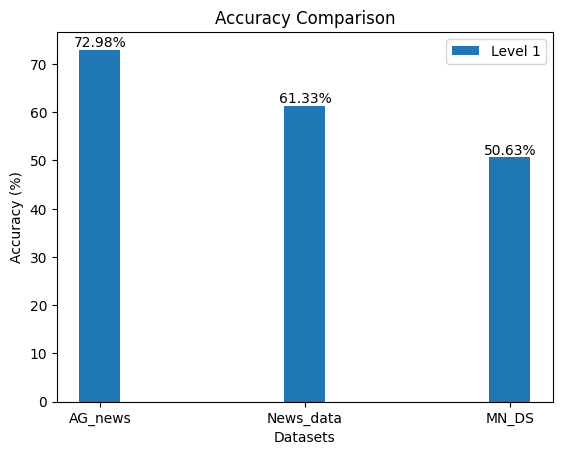

In [ ]:
labels = ["AG_news","News_data","MN_DS"]
accuracy_list_1 = [accuracy_1, accuracy_2, accuracy_3]
plot_metrics(labels, accuracy_list_1, False)

# Level 2

## 4 Topics Data

In [ ]:
df_pred_1_2 = find_max_2_categories_for_lists(df_prb_1)

In [ ]:
df_pred_1_2 = return_best_category_from_2_categories(Y_1 , df_pred_1_2)

In [ ]:
df_1["L2_predicted"] = df_pred_1_2
df_1.to_csv("4t+pred.csv")
df_1

,label,title,content,predicted,L2_predicted
0,Business,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Business,Business
1,Business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Business,Business
2,Business,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,World,Business
3,Business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",World,Business
4,Business,"Stocks End Up, But Near Year Lows (Reuters)",Reuters - Stocks ended slightly higher on Frid...,Business,Business
...,...,...,...,...,...
119994,World,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...,World,World
119995,Sports,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...,Sports,Sports
119996,Sports,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...,Sports,Sports
119997,Sports,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...,Sports,Sports


In [ ]:
accuracy_1_2, precision_1_2, recall_1_2, f1_1_2 = compute_classification_report(Y_1 , df_pred_1_2)

Classification Report:
              precision    recall  f1-score   support

    Business       0.78      0.95      0.86     29999
    Sci/Tech       0.97      0.67      0.79     30000
      Sports       0.99      0.99      0.99     30000
       World       0.91      0.99      0.94     30000

    accuracy                           0.90    119999
   macro avg       0.91      0.90      0.89    119999
weighted avg       0.91      0.90      0.89    119999

Accuracy: 0.8981158176318136
Precision: 0.9107895084626056
Recall: 0.898116275542518
F1 Score: 0.8945589921579229


## 6 Topics Data

In [ ]:
df_pred_2_2 = find_max_2_categories_for_lists(df_prb_2)

In [ ]:
df_pred_2_2 = return_best_category_from_2_categories(Y_2 , df_pred_2_2)

In [ ]:
df_2["L2_predicted"] = df_pred_2_2
df_2.to_csv("6t+pred.csv")
df_2

,Title,Excerpt,Category,predicted,L2_predicted
0,"Uefa Opens Proceedings against Barcelona, Juve...",Uefa has opened disciplinary proceedings again...,sports,Sports,Sports
1,Amazon Blames Inflation as It Increases Cost o...,The increases are steeper than the 17 percent ...,business,tech,business
2,Nigeria’s Parliament Passes Amended Electoral ...,Nigeria's Senate on Tuesday passed the harmoni...,politics,politics,politics
3,Nigeria: Lagos Governor Tests Positive for Cov...,"The Lagos State Governor, Mr. Babajide Sanwo-O...",health,health,health
4,South Africa Calls For Calm as Electoral Refor...,South Africa has raised concerns about the det...,politics,politics,politics
...,...,...,...,...,...
823,Nigeria’s Central Bank Introduces ‘Naira 4 Dol...,The Central Bank of Nigeria (CBN) has introduc...,business,business,business
824,Super Eagles to Host Leone Stars in AFCON 2023...,Following Tuesday night’s draw for the qualifi...,sports,Sports,Sports
825,Frustration in Nigeria Breeding Calls for Sece...,"Ekiti State Governor, Dr. Kayode Fayemi on Tue...",politics,politics,politics
826,Coca-Cola European Buys Australian Bottler for...,Coca-Cola European Partners Plc has agreed to ...,business,business,business


In [ ]:
accuracy_2_2, precision_2_2, recall_2_2, f1_2_2 = compute_classification_report(Y_2 , df_pred_2_2)

Classification Report:
               precision    recall  f1-score   support

       Sports       0.00      1.00      0.00         0
     business       0.88      0.96      0.92      1492
entertainment       0.94      0.85      0.89       449
       health       0.89      0.89      0.89       647
     politics       0.94      0.97      0.95      1263
       sports       1.00      0.00      0.00      1323
         tech       0.81      0.96      0.88       340

     accuracy                           0.72      5514
    macro avg       0.78      0.81      0.65      5514
 weighted avg       0.92      0.72      0.70      5514

Accuracy: 0.7161770039898441
Precision: 0.7792068493542745
Recall: 0.8054283548173744
F1 Score: 0.6478856540551821


## 17 Topics Data

In [ ]:
df_pred_3_2 = find_max_2_categories_for_lists(df_prb_3)

In [ ]:
df_pred_3_2 = return_best_category_from_2_categories(Y_3 , df_pred_3_2)

In [ ]:
df_3["L2_predicted"] = df_pred_3_2
df_3.to_csv("17t+pred.csv")
df_3

,data_id,id,date,source,title,content,author,url,published,published_utc,collection_utc,category_1,category_2,predicted,L2_predicted
0,1809,abcnews--2019-10-31--Virginia mom charged with...,2019-10-31,abcnews,Virginia mom charged with murder in 2-year-old...,The Virginia woman whose 2-year-old son was fo...,NaN,https://abcnews.go.com/US/wireStory/virginia-m...,"Thu, 31 Oct 2019 16:49:56 -0400",1572554996,1572559512,"crime, law and justice",crime,"crime, law and justice","crime, law and justice"
1,1980,abcnews--2019-11-07--2 escaped murder suspects...,2019-11-07,abcnews,2 escaped murder suspects arrested at US-Mexic...,Authorities are trying to determine if anyone ...,NaN,https://abcnews.go.com/US/wireStory/escaped-mu...,"Thu, 07 Nov 2019 00:13:12 -0500",1573103592,1573131986,"crime, law and justice",crime,"crime, law and justice","crime, law and justice"
2,1995,abcnews--2019-11-07--Family turns in escaped b...,2019-11-07,abcnews,"Family turns in escaped boy, 13, suspected in ...",A 13-year-old suspect in a double homicide who...,NaN,https://abcnews.go.com/US/wireStory/family-tur...,"Thu, 07 Nov 2019 07:39:54 -0500",1573130394,1573131982,"crime, law and justice",crime,"crime, law and justice","crime, law and justice"
3,2740,abcnews--2019-12-02--Mother charged with murde...,2019-12-02,abcnews,Mother charged with murder in deaths of 2 youn...,The mother of two young children found hanging...,NaN,https://abcnews.go.com/US/wireStory/mother-cha...,"Mon, 02 Dec 2019 11:30:59 -0500",1575304259,1575308811,"crime, law and justice",crime,"crime, law and justice","crime, law and justice"
4,7038,ageofautism--2019-04-12--Physician Father and ...,2019-04-12,ageofautism,"Physician, Father and Caretaker of 29 Year Old...","""One family member said Derek “can be violent ...",Age of Autism,http://feedproxy.google.com/~r/ageofautism/~3/...,2019-04-12 09:00:00+00:00,1555074000,1567543083,"crime, law and justice",crime,"crime, law and justice","crime, law and justice"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10912,907640,therussophileorg--2019-12-15--Iran to build ov...,2019-12-15,therussophileorg,"Iran to build over 30,000 housing units in Syr...",This post was originally published on this sit...,News Desk,https://www.therussophile.org/iran-to-build-ov...,"Sun, 15 Dec 2019 10:42:50 +0000",1576424570,1576413702,"conflict, war and peace",post-war reconstruction,society,society
10913,892720,therussophileorg--2019-10-12--Ukraine has no m...,2019-10-12,therussophileorg,Ukraine has no money for reconstruction of Don...,This post was originally published on this sit...,Michael Sullivan,https://www.therussophile.org/ukraine-has-no-m...,"Sat, 12 Oct 2019 20:56:01 +0000",1570928161,1570922006,"conflict, war and peace",post-war reconstruction,politics,politics
10914,870499,therussophileorg--2019-07-06--Irans contributi...,2019-07-06,therussophileorg,Iran’s contribution is needed to rebuild Iraq ...,This\n\n[post](http://www.presstv.ir/Detail/20...,Michael Sullivan,https://www.therussophile.org/irans-contributi...,2019-07-06 17:51:38+00:00,1562449898,1567536625,"conflict, war and peace",post-war reconstruction,"economy, business and finance","economy, business and finance"
10915,887334,therussophileorg--2019-09-25--Iraqi president ...,2019-09-25,therussophileorg,Iraqi president demands international help for...,This\n\n[post](http://www.presstv.ir/Detail/20...,Michael Sullivan,https://www.therussophile.org/iraqi-president-...,2019-09-25 16:58:01+00:00,1569445081,1570222223,"conflict, war and peace",post-war reconstruction,"conflict, war and peace","conflict, war and peace"


In [ ]:
accuracy_3_2, precision_3_2, recall_3_2, f1_3_2 = compute_classification_report(Y_3 , df_pred_3_2)

Classification Report:
                                           precision    recall  f1-score   support

   arts, culture, entertainment and media       0.36      0.59      0.45       300
                  conflict, war and peace       0.78      0.63      0.70       800
                   crime, law and justice       0.55      0.88      0.68       500
disaster, accident and emergency incident       0.71      0.75      0.73       500
            economy, business and finance       0.58      0.69      0.63       400
                                education       0.85      0.68      0.76       607
                              environment       0.78      0.83      0.81       600
                                   health       0.59      0.86      0.70       700
                           human interest       0.35      0.36      0.35       600
                                   labour       0.89      0.62      0.73       703
                    lifestyle and leisure       0.68      0.52 

## Plot the accuracy

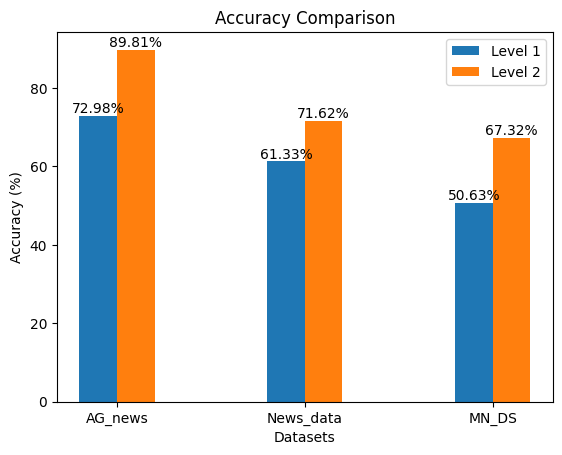

In [ ]:
accuracy_list_2 = [accuracy_1_2, accuracy_2_2, accuracy_3_2]
accuracy_list_3 = [ accuracy_list_1, accuracy_list_2]
plot_metrics(labels, accuracy_list_3, True)